# Visualizing Data with Python

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
# load data from csv
df_students = pd.read_csv('grades_2.csv', delimiter=',', header='infer')

## Data Preparation

In [5]:
# drop rows with missing data
df_students = df_students.dropna(axis=0, how='any')

In [6]:
# calculate passing grades
passes = pd.Series(df_students['Grade'] >= 60)

df_students = pd.concat([df_students, passes.rename('Pass')], axis=1)

df_students

,Name,StudyHours,Grade,Pass
0,Dan,10.00,50.0,False
1,Joann,11.50,50.0,False
2,Pedro,9.00,47.0,False
3,Rosie,16.00,97.0,True
4,Ethan,9.25,49.0,False
5,Vicky,1.00,3.0,False
6,Frederic,11.50,53.0,False
7,Jimmie,9.00,42.0,False
8,Rhonda,8.50,26.0,False
9,Giovanni,14.50,74.0,True


## Data Viz

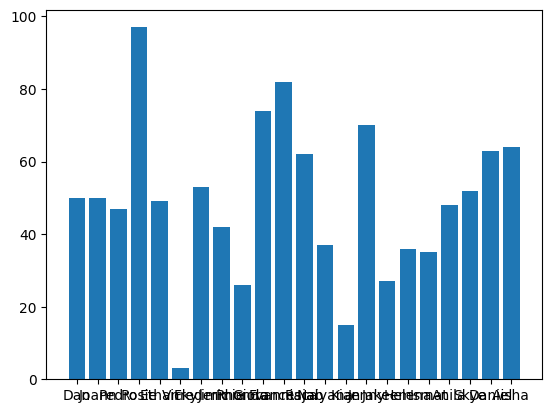

In [9]:
# create bar plot of name vs grade
plt.bar(x=df_students.Name, height=df_students.Grade)

plt.show()

That is a messy and not very helpful visual. Lets improve it

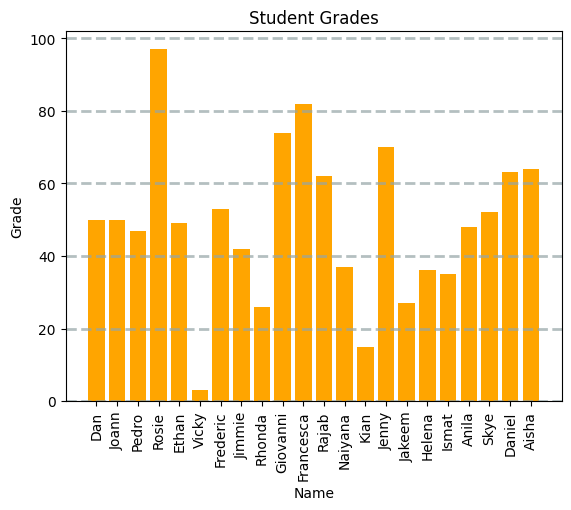

In [10]:
plt.bar(x=df_students.Name, height=df_students.Grade, color='orange')

# customize the plot
plt.title('Student Grades')
plt.xlabel('Name')
plt.ylabel('Grade')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.xticks(rotation=90)

plt.show()

That's much better. The names are legible, the grid assists graph readability, and there are now axis and graph titles.

A plot is contained in a figure. In this previous example, the figure was created implicitly. However, it can be done explicitly as well.

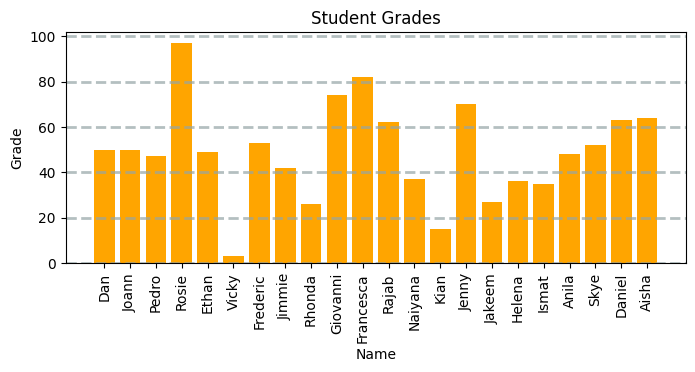

In [11]:
fig = plt.figure(figsize=(8, 3))
# explicitly created figure with specified size

plt.bar(x=df_students.Name, height=df_students.Grade, color='orange')

# customize the plot
plt.title('Student Grades')
plt.xlabel('Name')
plt.ylabel('Grade')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.xticks(rotation=90)

plt.show()

Figures can contain multiple subplots, each on its own axis.

C:\Users\dhsav\AppData\Local\Temp\ipykernel_13964\3791915379.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(df_students.Name, rotation=90)


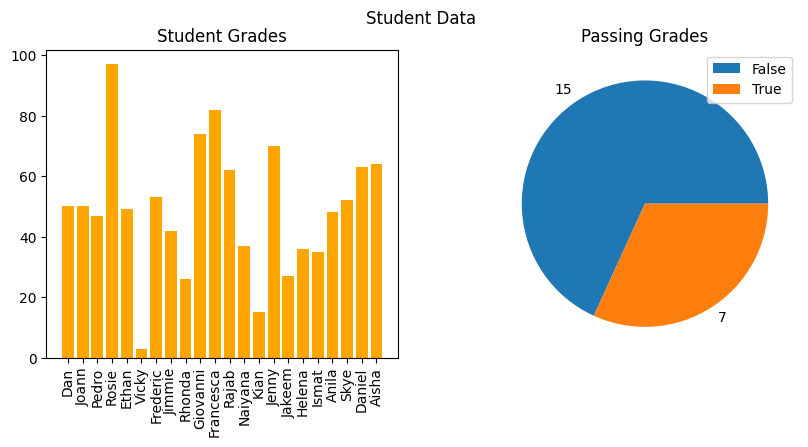

In [12]:
# create a figure for 2 subplots (1 row, 2 columns)
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

# create bar plot of name vs grade on the first axis
ax[0].bar(x=df_students.Name, height=df_students.Grade, color='orange')
ax[0].set_title('Student Grades')
ax[0].set_xticklabels(df_students.Name, rotation=90)

# create a pie chart of passing grades on the second axis
pass_counts = df_students['Pass'].value_counts()
ax[1].pie(pass_counts, labels=pass_counts)
ax[1].set_title('Passing Grades')
ax[1].legend(pass_counts.keys().tolist())

# add a title to the figure
fig.suptitle('Student Data')

plt.show()

Many libraries provide methods to abstract matplotlib functions and simplify plotting. for example, dataframes have a built-in plot method.

<Axes: xlabel='Name'>

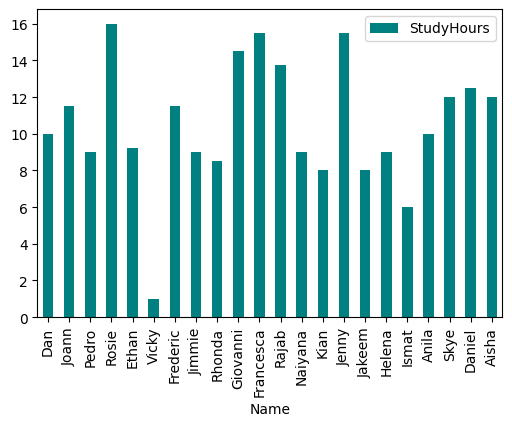

In [13]:
df_students.plot.bar(x='Name', y='StudyHours', color='teal', figsize=(6,4))

## Statistical Analysis

### Descriptive Statistics and Data distributions

When examining a feature, it is often useful to know the distribution of the data. This can be done with a histogram.

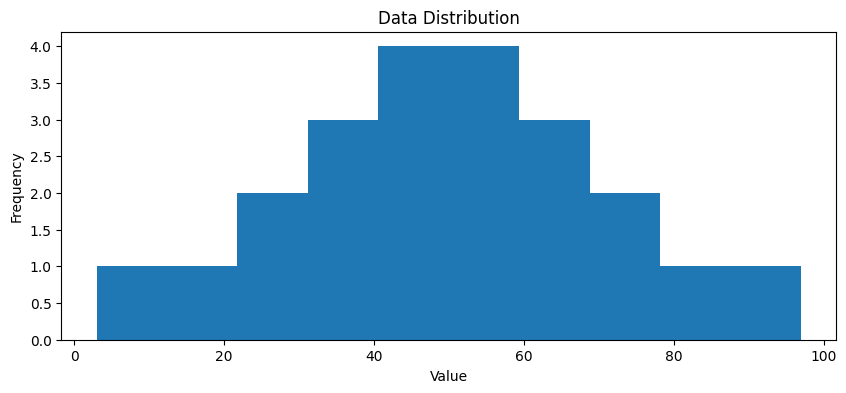

In [20]:
var_data = df_students['Grade']

# make a plot
fig = plt.figure(figsize=(10,4))

# plot histogram
plt.hist(var_data)

# add title and axis labels
plt.title('Data Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.show()

In [22]:
# explore measures of central tendency

var = df_students['Grade']

min_val = var.min()
max_val = var.max()
mean_val = var.mean()
med_val = var.median()
mod_val = var.mode()[0]

print(f'Min: {min_val}\nMax: {max_val}\nMean: {mean_val}\nMedian: {med_val}\nMode: {mod_val}')

Min: 3.0
Max: 97.0
Mean: 49.18181818181818
Median: 49.5
Mode: 50.0


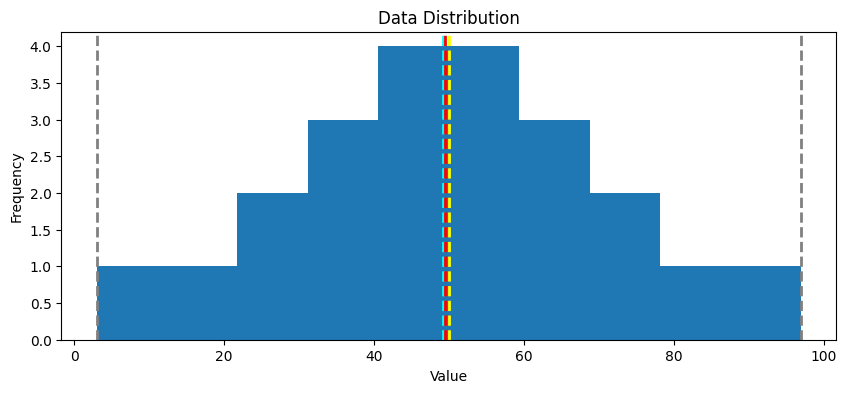

In [25]:
fig = plt.figure(figsize=(10,4))

plt.hist(var)

# add lines for the statistics
plt.axvline(min_val, color='gray', linestyle='dashed', linewidth=2)
plt.axvline(max_val, color='gray', linestyle='dashed', linewidth=2)
plt.axvline(mean_val, color='cyan', linestyle='dashed', linewidth=2)
plt.axvline(med_val, color='red', linestyle='dashed', linewidth=2)
plt.axvline(mod_val, color='yellow', linestyle='dashed', linewidth=2)

# add titles and labels
plt.title('Data Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.show()

Another useful plot for examining distribution is a boxplot. Boxplots show the distribution of data, and the median, quartiles, and outliers.

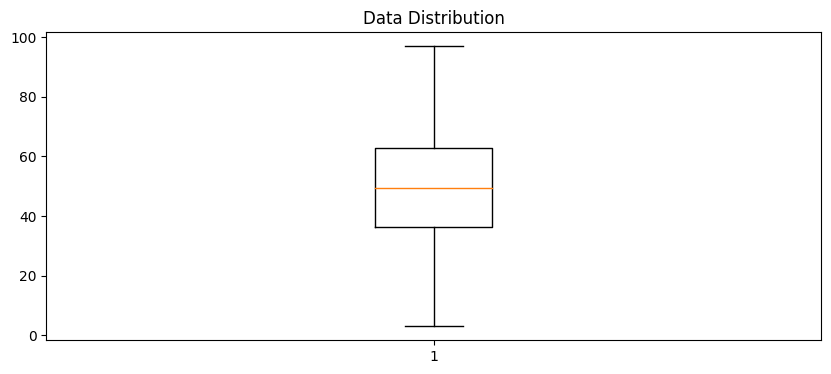

In [26]:
var = df_students['Grade']

fig = plt.figure(figsize=(10,4))

plt.boxplot(var)

plt.title('Data Distribution')

plt.show()

In [27]:
# create a reusable function for showing data distributions

def show_distribution(var_data):
    # get statistics
    min_val = var_data.min()
    max_val = var_data.max()
    mean_val = var_data.mean()
    med_val = var_data.median()
    mod_val = var_data.mode()[0]

    # print statistics
    print(f'Min: {min_val}\nMax: {max_val}\nMean: {mean_val}\nMedian: {med_val}\nMode: {mod_val}')

    fig, ax = plt.subplots(2, 1, figsize=(10,4))

    # plot histogram
    ax[0].hist(var_data)
    ax[0].set_ylabel('Frequency')

    # add lines for the statistics
    ax[0].axvline(min_val, color='gray', linestyle='dashed', linewidth=2)
    ax[0].axvline(max_val, color='gray', linestyle='dashed', linewidth=2)
    ax[0].axvline(mean_val, color='cyan', linestyle='dashed', linewidth=2)
    ax[0].axvline(med_val, color='red', linestyle='dashed', linewidth=2)
    ax[0].axvline(mod_val, color='yellow', linestyle='dashed', linewidth=2)

    # plot boxplot
    ax[1].boxplot(var_data, vert=False)
    ax[1].set_xlabel('Value')

    fig.suptitle('Data Distribution')

    plt.show()

Min: 3.0
Max: 97.0
Mean: 49.18181818181818
Median: 49.5
Mode: 50.0


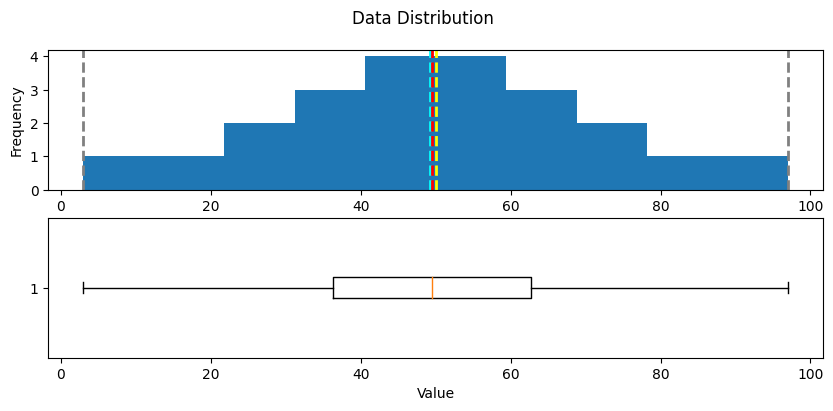

In [28]:
col = df_students['Grade']

show_distribution(col)

All central tendency measurements are in the middle of the distribution and its symmetric with values progressively lowering towards the extremities. 

Statistics is about taking samples of data and using them to extrapolate to the population. With enough samples, you can calculate a probability density function, which estimates the distribution of the whole population.

In [29]:
def show_density(var_data):
    fig = plt.figure(figsize=(10,4))

    # plot density
    var_data.plot.density()

    # add title and axis labels
    plt.title('Data Density')

    # show mean, median, mode
    plt.axvline(x=var_data.mean(), color='cyan', linestyle='dashed', linewidth=2)
    plt.axvline(x=var_data.median(), color='red', linestyle='dashed', linewidth=2)
    plt.axvline(x=var_data.mode()[0], color='yellow', linestyle='dashed', linewidth=2)

    plt.show()

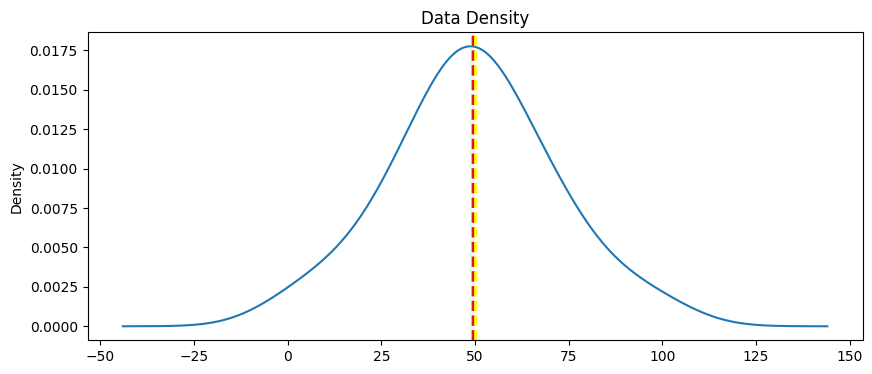

In [30]:
col = df_students['Grade']
show_density(col)

Here we can see that the population density fits a bell curve, meaning we have a normal distribution, with the mean and mode at the center and symmetric tails. 